In [1]:
print('Hello world and hello iris dataset!!!')

Hello world and hello iris dataset!!!


## First steps
0. First of all we should load our libraries

In [2]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data pre-processing

1. Now we will load the dataframe and look at the most important information about him

In [6]:
def import_data(dataset_path: str,sep:str=None ) -> pd.DataFrame:
    data = pd.read_csv(dataset_path,sep,engine='python')
    return data

dataset = import_data('iris_csv.csv')
dataset

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset.shape

(150, 5)

In [8]:
dataset.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
print('How much there are NaN: ')
dataset.isnull().sum()

How much there are NaN: 


sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

# Visualisations
2. Let's make a proper EDA on this toy dataset, we will make several different plots

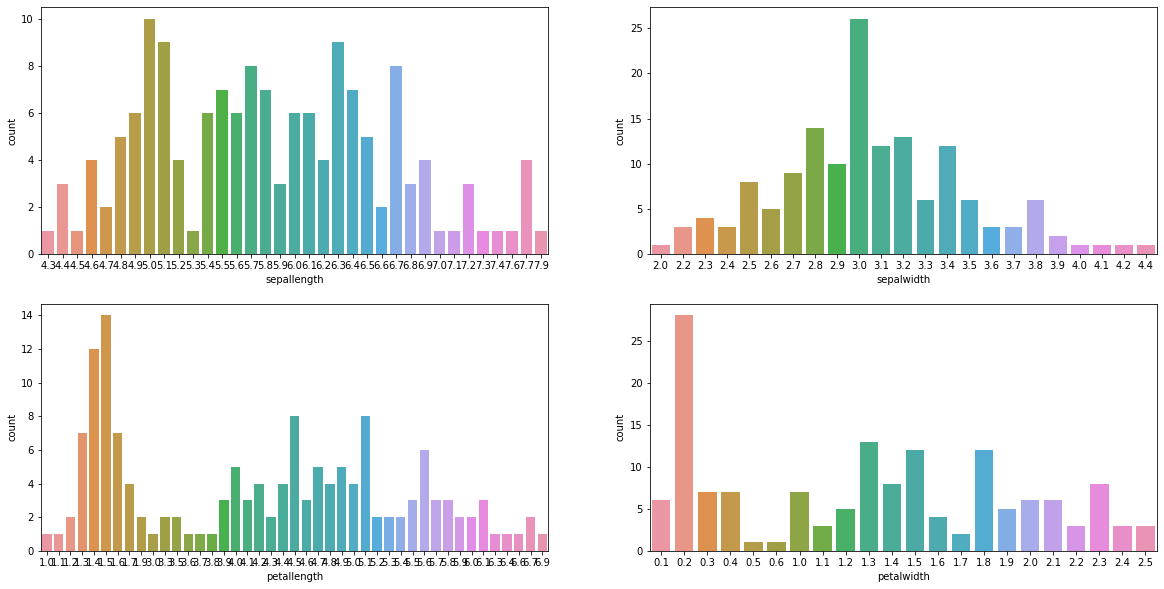

In [8]:
f,ax = plt.subplots(2,2,figsize=(20,10))
for variable, subplot in zip(dataset, ax.flatten()):
    sns.countplot(x=variable,data=dataset,ax=subplot)
plt.show()

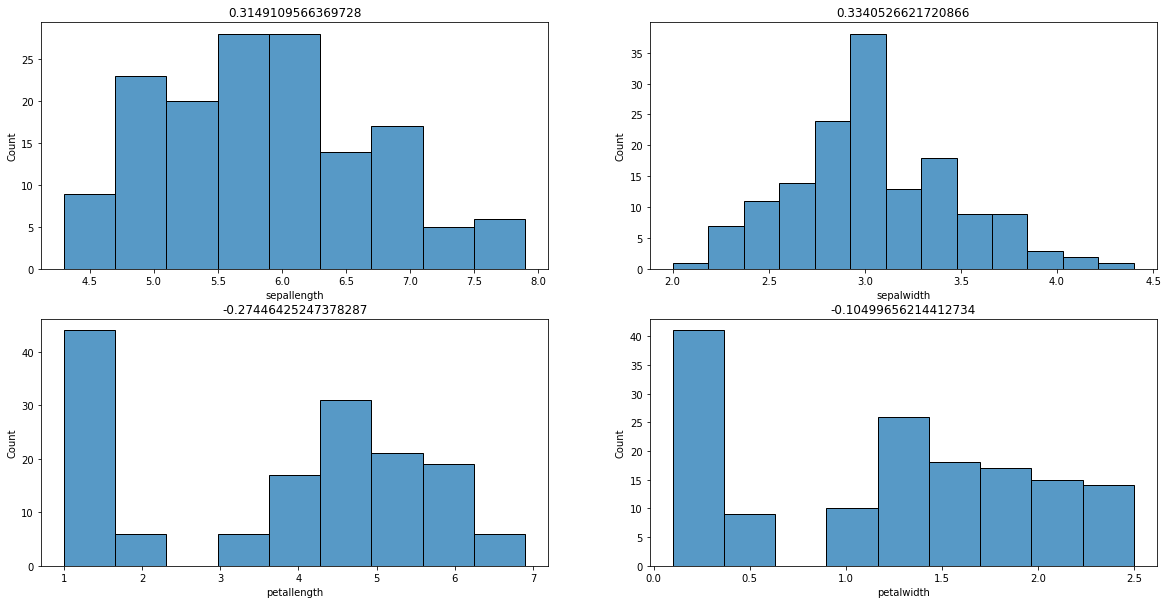

In [9]:
f,ax = plt.subplots(2,2,figsize=(20,10))
for variable, subplot in zip(dataset, ax.flatten()):
    sns.histplot(x=variable,data=dataset,ax=subplot).set_title(dataset[variable].skew())
plt.show()

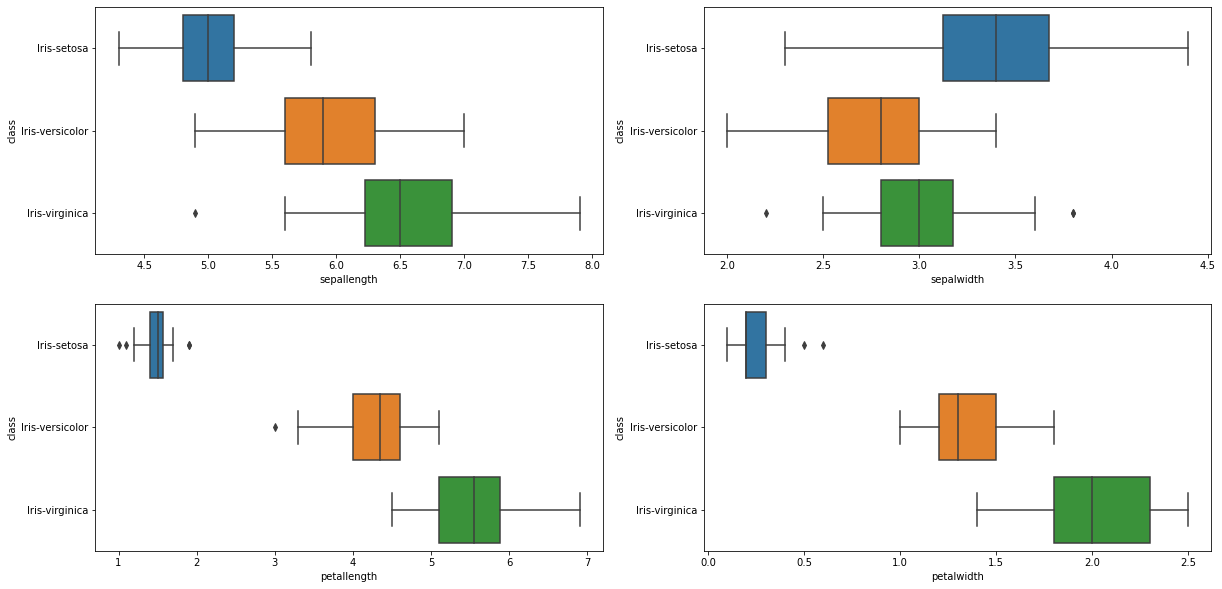

In [10]:
f,ax = plt.subplots(2,2,figsize=(20,10))
for variable, subplot in zip(dataset, ax.flatten()):
    sns.boxplot(x=variable,y='class',data=dataset,ax=subplot)
plt.show()

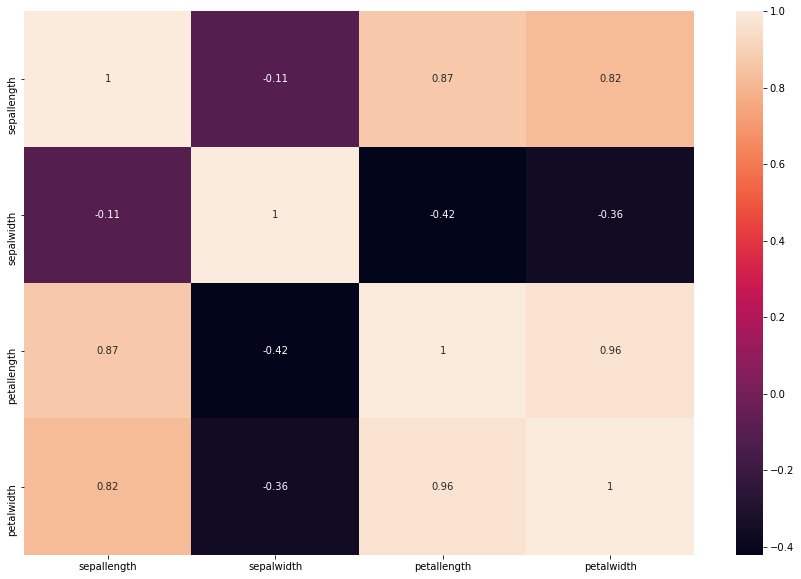

In [11]:
fig,axes = plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True,ax=axes)
plt.show()

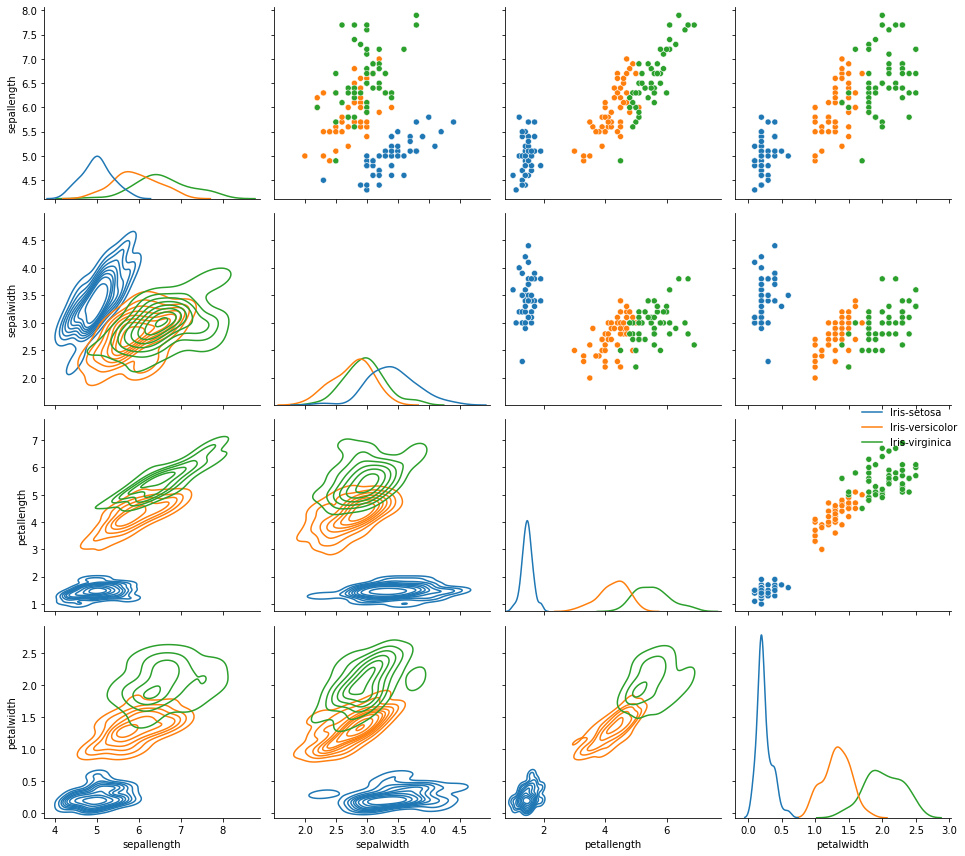

In [12]:
g = sns.PairGrid(dataset, hue="class",height=3)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot)
g.add_legend(title="", adjust_subtitles=True)
plt.tight_layout()

## Conclusions
- In histplots we can see interesting skew coefficient, for sepallength and sepalwidth it is above 0.3 so we can see a small positive assymetry
- In boxplots petallenght and petalwidth are very similar for iris-versicolor and iris-virginica i can make a hypothesis that for clustering this dataset into 3 clusters will have a problem with these two flowers
- In heatmap we can see a huge positive correlation between petalwidth and petallength also sepallength and petallength are correletad with 0.87
- In PairdGrid we can easily see that iris-setosa always are a bit aside from two others, this flower it will be easy to recognize for cluster models

 # Firstly let's implement supervised learning models

3. We need to convert our class variable to numeric for model

In [13]:
replacing = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
dataset['class'] = dataset['class'].replace(replacing)
dataset['class']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

4. Split into train and test for 80/20

In [10]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.2
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=7)

5. Apply models

In [11]:
import warnings
warnings.filterwarnings('ignore')
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.983333 (0.033333)
KNN: 0.983333 (0.033333)


**Conclusion**

As we can see, the results for both models are above 98.3% and similar for each other

# CLUSTERING

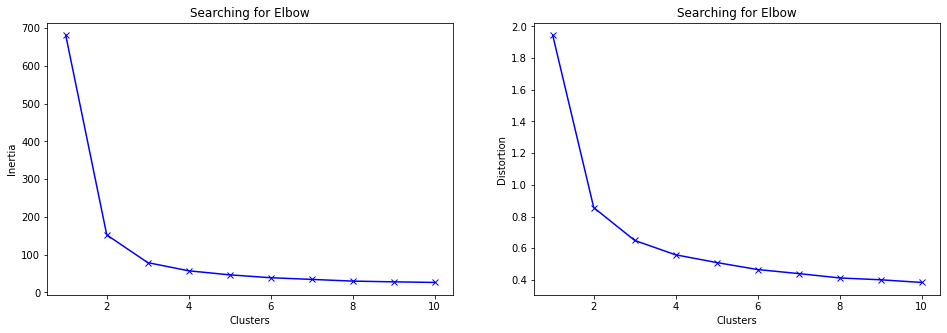

For n_clusters=2, The Silhouette Coefficient is 0.6808136202936816
For n_clusters=3, The Silhouette Coefficient is 0.5525919445499757
For n_clusters=4, The Silhouette Coefficient is 0.4978256901095472
For n_clusters=5, The Silhouette Coefficient is 0.49285559183161204
For n_clusters=6, The Silhouette Coefficient is 0.36820569682713084
For n_clusters=7, The Silhouette Coefficient is 0.35974933043591345
For n_clusters=8, The Silhouette Coefficient is 0.3651645360269737
For n_clusters=9, The Silhouette Coefficient is 0.344397970893546
For n_clusters=10, The Silhouette Coefficient is 0.3335708163077891


In [13]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

X = dataset.drop(['class'], axis=1)
clusters = [*range(1, 11)]

distortions = []
inertias = []
 
for k in clusters:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

f,ax = plt.subplots(1,2,figsize=(16, 5))
ax[0].plot(clusters, inertias, 'bx-')
ax[0].set_title('Searching for Elbow')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(clusters, distortions, 'bx-')
ax[1].set_title('Searching for Elbow')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Distortion')

plt.show()


for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

## Conclusion
- We can see that our Silhouette Coefficient is maximal with number of clusters = 2, it's obvious because we have been seen PairGrid plot where two flowers were usually very close to each other, but we have 3 type of flowers, so we will choose second maximal coefficient after n=2 it's n=3

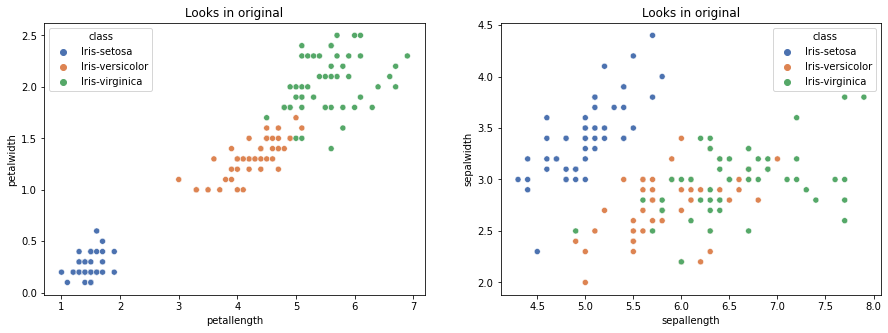

In [20]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
pred = kmeans.predict(X)
n_clusters_5 = pd.DataFrame(X)
n_clusters_5['cluster'] = pred

f,ax = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=n_clusters_5, x="petallength", y="petalwidth", hue=dataset['class'], palette="deep",ax=ax[0]).set_title("Looks in original")
sns.scatterplot(data=n_clusters_5, x="sepallength", y="sepalwidth", hue=dataset['class'], palette="deep",ax=ax[1]).set_title("Looks in original")
plt.show()

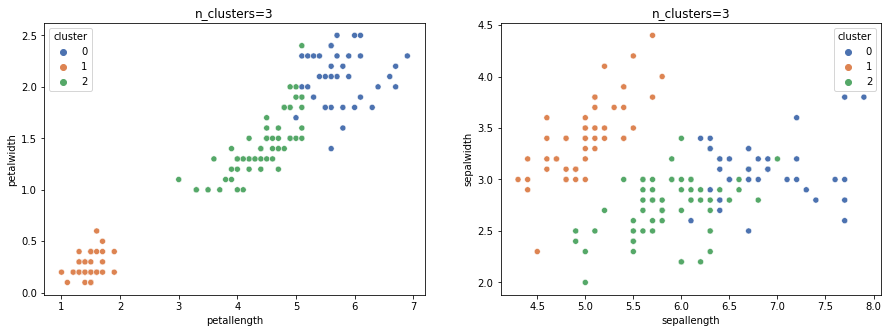

In [19]:
f,ax = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=n_clusters_5, x="petallength", y="petalwidth", hue=n_clusters_5['cluster'], palette="deep",ax=ax[0]).set_title("n_clusters=3")
sns.scatterplot(data=n_clusters_5, x="sepallength", y="sepalwidth", hue=n_clusters_5['cluster'], palette="deep",ax=ax[1]).set_title("n_clusters=3")
plt.show()

## Conclusion
- Indeed, there are some problem for clustering model with sepals of iris-versicolor and iris-virginica, so we can make say that Kmeans is not the best model there because at this dataset he can't work properly
- That's all!!!